In [1]:
import os
import pandas as pd
import numpy as np
import nibabel as nib
from nilearn import datasets
from nilearn import plotting
from nilearn import input_data
from nilearn.input_data import NiftiLabelsMasker
from pathlib import Path
from nilearn import image
from nilearn.connectome import ConnectivityMeasure
import matplotlib.pyplot as plt

/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
DataDir = ('/../../..')

power = datasets.fetch_coords_power_2011()

coords = np.vstack((power.rois['x'], power.rois['y'], power.rois['z'])).T

print(f"Stacked power coordinates in array of shape {coords.shape}")

Stacked power coordinates in array of shape (264, 3)


In [3]:
spheres_masker = input_data.NiftiSpheresMasker(seeds=coords,
                                               smoothing_fwhm=6, 
                                               radius=5.,
                                               detrend=True, 
                                               standardize=True, 
                                               low_pass=0.1, 
                                               high_pass=0.01,
                                               t_r=2)

## Extract time series using Graphical Lasso

In [ ]:
subID = ['sub-01', ........]

# Removed sub-59, and sub-70; 27 & 35

for subject in subID:
    
    if not os.path.exists(f'../{subject}'):
        os.makedirs(f'../{subject}')
    
    img = nib.load(f'../../../_bold.nii.gz')
    
    timeseries = spheres_masker.fit_transform(img)
    
    print(f'time series has {timeseries.shape[0]} samples')
    print()
    
    try:
            
        from sklearn.covariance import GraphicalLassoCV
    except ImportError:
        # for Scitkit-Learn < v0.20.0

        from sklearn.covariance import GraphLassoCV as GraphicalLassoCV

    covariance_estimator = GraphicalLassoCV(cv=3, 
                                            verbose=1)

    covariance_estimator.fit(timeseries)
    
    matrix = covariance_estimator.covariance_
    
    print(f'Covariance matrix has shape {matrix.shape}.')
    print()
    
    np.savetxt(f'../ConnectivityMatrix_GraphLasso/{subject}_power.txt',
               matrix,
               fmt='%.2f')
    

    # Generate Connectivity Matrix
    fig1 = plt.figure(figsize=(10,10))

        
    plot1 = plotting.plot_matrix(matrix, 
                                 tri='lower',
                                 vmin=-1.,
                                 vmax=1., 
                                 colorbar=True,
                                 title=f'{subject}_power_correlation_matrix',
                                 figure=fig1)
    plot1.figure.savefig(f'../{subject}/{subject}_ConnectivityMatrix.png',
                         dpi=300,
                         bbox_inches='tight')
   
    # Generate Functional Connectome
    fig2 = plt.figure(figsize=(10,10))

    plot2 = plotting.plot_connectome(matrix,
                                     coords, 
                                     title='f{subject}_power_correlation_graph',
                                     edge_threshold='99.8%', 
                                     node_size=20,
                                     colorbar=True,
                                     figure=fig2) 
  
        
    plot2.savefig(f'../{subject}/{subject}_ConnectomeBrain.png');

## Group level connectivity - Control

In [4]:
subID = ['sub-01', ........]

timeseries_all = []

for subject in subID:
    
    if not os.path.exists(f'../{subject}'):
        os.makedirs(f'../{subject}')
    
    img = nib.load(f'../../.._bold.nii.gz')
    
    timeseries = spheres_masker.fit_transform(img)
    
    try:
            
        from sklearn.covariance import GraphicalLassoCV
    except ImportError:
        # for Scitkit-Learn < v0.20.0

        from sklearn.covariance import GraphLassoCV as GraphicalLassoCV

    covariance_estimator = GraphicalLassoCV(cv=3, 
                                            verbose=1)

    covariance_estimator.fit(timeseries)
    
    matrix = covariance_estimator.covariance_
    
    print(f'Covariance matrix has shape {matrix.shape}.')
    print()
    
    timeseries_all.append(matrix)

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.3s finished


[GraphLassoCV] Done refinement  2 out of 4:  13s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.5s finished


[GraphLassoCV] Done refinement  3 out of 4:  21s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.4s finished


[GraphLassoCV] Done refinement  4 out of 4:  34s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s finished


[GraphLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.1s finished


[GraphLassoCV] Done refinement  2 out of 4:  16s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.8s finished


[GraphLassoCV] Done refinement  3 out of 4:  29s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.1s finished


[GraphLassoCV] Done refinement  4 out of 4:  43s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s finished


[GraphLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.8s finished


[GraphLassoCV] Done refinement  2 out of 4:  16s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.7s finished


[GraphLassoCV] Done refinement  3 out of 4:  30s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.3s finished


[GraphLassoCV] Done refinement  4 out of 4:  45s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:252: ConvergenceWarning: graph_lasso: did not converge after 100 iteration: dual gap: -2.004e-03
  ConvergenceWarning)


Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.4s finished


[GraphLassoCV] Done refinement  2 out of 4:  13s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.3s finished


[GraphLassoCV] Done refinement  3 out of 4:  27s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.0s finished


[GraphLassoCV] Done refinement  4 out of 4:  43s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.1s finished


[GraphLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.6s finished


[GraphLassoCV] Done refinement  2 out of 4:  13s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.4s finished


[GraphLassoCV] Done refinement  3 out of 4:  20s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.1s finished


[GraphLassoCV] Done refinement  4 out of 4:  26s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s finished


[GraphLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.1s finished


[GraphLassoCV] Done refinement  2 out of 4:  18s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.1s finished


[GraphLassoCV] Done refinement  3 out of 4:  29s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.5s finished


[GraphLassoCV] Done refinement  4 out of 4:  42s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.2s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.9s finished


[GraphLassoCV] Done refinement  2 out of 4:  12s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.2s finished


[GraphLassoCV] Done refinement  3 out of 4:  23s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.3s finished


[GraphLassoCV] Done refinement  4 out of 4:  35s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.6s finished


[GraphLassoCV] Done refinement  2 out of 4:  12s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.6s finished


[GraphLassoCV] Done refinement  3 out of 4:  25s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.4s finished


[GraphLassoCV] Done refinement  4 out of 4:  31s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.7s finished


[GraphLassoCV] Done refinement  2 out of 4:  14s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.7s finished


[GraphLassoCV] Done refinement  3 out of 4:  27s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.5s finished


[GraphLassoCV] Done refinement  4 out of 4:  34s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s finished


[GraphLassoCV] Done refinement  1 out of 4:   2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.1s finished


[GraphLassoCV] Done refinement  2 out of 4:  14s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.1s finished


[GraphLassoCV] Done refinement  3 out of 4:  30s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.7s finished


[GraphLassoCV] Done refinement  4 out of 4:  41s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.7s finished


[GraphLassoCV] Done refinement  2 out of 4:  14s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.6s finished


[GraphLassoCV] Done refinement  3 out of 4:  28s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.5s finished


[GraphLassoCV] Done refinement  4 out of 4:  40s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:252: ConvergenceWarning: graph_lasso: did not converge after 100 iteration: dual gap: -1.708e-03
  ConvergenceWarning)


Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.3s finished


[GraphLassoCV] Done refinement  1 out of 4:   5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.5s finished


[GraphLassoCV] Done refinement  2 out of 4:  16s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.9s finished


[GraphLassoCV] Done refinement  3 out of 4:  28s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.9s finished


[GraphLassoCV] Done refinement  4 out of 4:  43s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:252: ConvergenceWarning: graph_lasso: did not converge after 100 iteration: dual gap: 9.329e-04
  ConvergenceWarning)


Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.8s finished


[GraphLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.0s finished


[GraphLassoCV] Done refinement  2 out of 4:  18s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.6s finished


[GraphLassoCV] Done refinement  3 out of 4:  27s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.8s finished


[GraphLassoCV] Done refinement  4 out of 4:  35s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s finished


[GraphLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.0s finished


[GraphLassoCV] Done refinement  2 out of 4:  16s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.8s finished


[GraphLassoCV] Done refinement  3 out of 4:  29s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.7s finished


[GraphLassoCV] Done refinement  4 out of 4:  41s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.3s finished


[GraphLassoCV] Done refinement  1 out of 4:   8s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.1s finished


[GraphLassoCV] Done refinement  2 out of 4:  21s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.8s finished


[GraphLassoCV] Done refinement  3 out of 4:  32s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.4s finished


[GraphLassoCV] Done refinement  4 out of 4:  43s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s finished


[GraphLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.0s finished


[GraphLassoCV] Done refinement  2 out of 4:  15s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.3s finished


[GraphLassoCV] Done refinement  3 out of 4:  23s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.4s finished


[GraphLassoCV] Done refinement  4 out of 4:  34s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.3s finished


[GraphLassoCV] Done refinement  1 out of 4:   5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.7s finished


[GraphLassoCV] Done refinement  2 out of 4:  16s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.9s finished


[GraphLassoCV] Done refinement  3 out of 4:  28s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.2s finished


[GraphLassoCV] Done refinement  4 out of 4:  39s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s finished


[GraphLassoCV] Done refinement  1 out of 4:   2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.3s finished


[GraphLassoCV] Done refinement  2 out of 4:  11s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.7s finished


[GraphLassoCV] Done refinement  3 out of 4:  24s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.2s finished


[GraphLassoCV] Done refinement  4 out of 4:  37s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.6s finished


[GraphLassoCV] Done refinement  1 out of 4:   5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.8s finished


[GraphLassoCV] Done refinement  2 out of 4:  19s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   17.3s finished


[GraphLassoCV] Done refinement  3 out of 4:  36s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.3s finished


[GraphLassoCV] Done refinement  4 out of 4:  50s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.0s finished


[GraphLassoCV] Done refinement  2 out of 4:  11s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.6s finished


[GraphLassoCV] Done refinement  3 out of 4:  21s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.6s finished


[GraphLassoCV] Done refinement  4 out of 4:  33s
Covariance matrix has shape (264, 264).



Correlations of subjects are stacked in an array of shape (20, 264, 264)

Mean correlation has shape (264, 264)



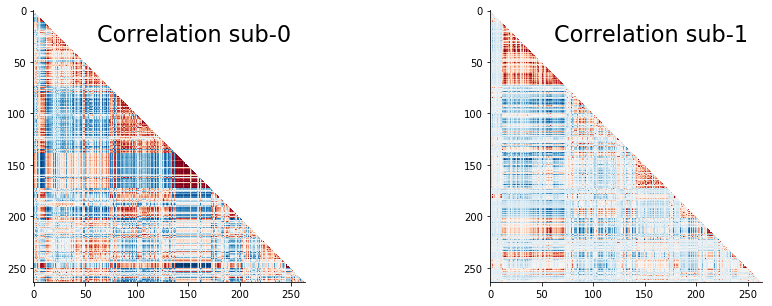

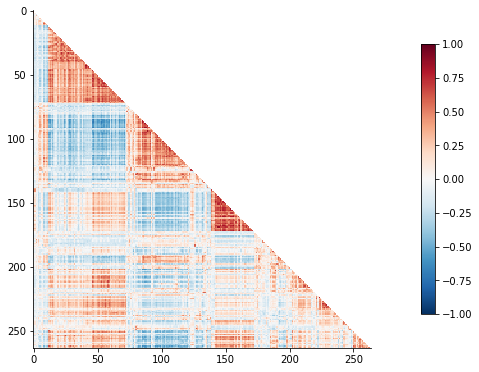

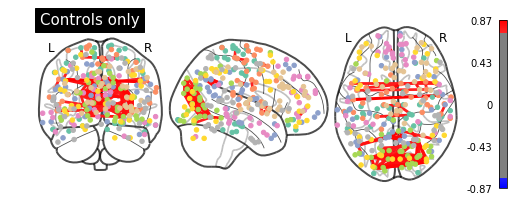

In [21]:
# Run group level correlation     
correlation_measure = ConnectivityMeasure(kind='correlation')

correlation_matrices = correlation_measure.fit_transform(timeseries_all)

# All individual coefficients are stacked in a unique 2D matrix.
print(f'Correlations of subjects are stacked in an array of shape {correlation_matrices.shape}')
print()

mean_correlation_matrix = correlation_measure.mean_
print(f'Mean correlation has shape {mean_correlation_matrix.shape}')
print()  

_, axes = plt.subplots(1, 2, figsize=(15, 5))

import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

for i, (matrix, ax) in enumerate(zip(correlation_matrices, axes)):
    
    plotting.plot_matrix(matrix, 
                         tri='lower',
                         colorbar=False, 
                         axes=ax,
                         title=(f'Correlation sub-{i}'))


# Generate Connectivity Matrix
fig3 = plt.figure(figsize=(10,10))

        
plot3 = plotting.plot_matrix(mean_correlation_matrix, 
                             tri='lower',
                             vmin=-1.,
                             vmax=1., 
                             colorbar=True)
                             #title=f'Controls only')

plot3.figure.savefig(f'../GroupLevelResults/ControlsOnly_ConnectivityMatrix_GraphLasso.png',
                     dpi=300,
                     bbox_inches='tight',
                     transparent=True)
    
plot4 = plotting.plot_connectome(mean_correlation_matrix,
                         coords, 
                         title='Controls only',
                         edge_threshold='99.8%',
                         node_size=20,
                         colorbar=True)

plot4.savefig(f'../GroupLevelResults/ControlsOnly_ConnectomeBrain_GraphLasso.png')

In [ ]:
subID = ['sub-01', ......]

timeseries_all = []

for subject in subID:
    
    if not os.path.exists(f'../{subject}'):
        os.makedirs(f'../{subject}')
    
    img = nib.load(f'../../.._bold.nii.gz')
    
    timeseries = spheres_masker.fit_transform(img)
    
    timeseries_all.append(timeseries)

## Group level connectivity - Patients

In [15]:
subID = ['sub-21', ......]

timeseries_patients = []

for subject in subID:
    
    if not os.path.exists(f'../{subject}'):
        os.makedirs(f'../{subject}')
    
    img = nib.load(f'../../...._bold.nii.gz')
    
    timeseries = spheres_masker.fit_transform(img)
    
    try:
            
        from sklearn.covariance import GraphicalLassoCV
    except ImportError:
        # for Scitkit-Learn < v0.20.0

        from sklearn.covariance import GraphLassoCV as GraphicalLassoCV

    covariance_estimator = GraphicalLassoCV(cv=3, 
                                            verbose=1)

    covariance_estimator.fit(timeseries)
    
    matrix = covariance_estimator.covariance_
    
    print(f'Covariance matrix has shape {matrix.shape}.')
    print()
    
    timeseries_patients.append(matrix)

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.2s finished


[GraphLassoCV] Done refinement  1 out of 4:   5s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.4s finished


[GraphLassoCV] Done refinement  2 out of 4:  14s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.7s finished


[GraphLassoCV] Done refinement  3 out of 4:  35s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.3s finished


[GraphLassoCV] Done refinement  4 out of 4:  49s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.4s finished


[GraphLassoCV] Done refinement  2 out of 4:  10s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.0s finished


[GraphLassoCV] Done refinement  3 out of 4:  21s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.5s finished


[GraphLassoCV] Done refinement  4 out of 4:  33s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s finished


[GraphLassoCV] Done refinement  1 out of 4:   2s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.0s finished


[GraphLassoCV] Done refinement  2 out of 4:   9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.0s finished


[GraphLassoCV] Done refinement  3 out of 4:  22s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.5s finished


[GraphLassoCV] Done refinement  4 out of 4:  36s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s finished


[GraphLassoCV] Done refinement  1 out of 4:   2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.9s finished


[GraphLassoCV] Done refinement  2 out of 4:   8s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.3s finished


[GraphLassoCV] Done refinement  3 out of 4:  19s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.1s finished


[GraphLassoCV] Done refinement  4 out of 4:  32s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.6s finished


[GraphLassoCV] Done refinement  2 out of 4:  14s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.8s finished


[GraphLassoCV] Done refinement  3 out of 4:  28s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   17.2s finished


[GraphLassoCV] Done refinement  4 out of 4:  45s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:252: ConvergenceWarning: graph_lasso: did not converge after 100 iteration: dual gap: -1.775e-03
  ConvergenceWarning)


Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.6s finished


[GraphLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.5s finished


[GraphLassoCV] Done refinement  2 out of 4:  15s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.8s finished


[GraphLassoCV] Done refinement  3 out of 4:  33s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.1s finished


[GraphLassoCV] Done refinement  4 out of 4:  49s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:252: ConvergenceWarning: graph_lasso: did not converge after 100 iteration: dual gap: -1.568e-03
  ConvergenceWarning)


Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s finished


[GraphLassoCV] Done refinement  1 out of 4:   2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.7s finished


[GraphLassoCV] Done refinement  2 out of 4:  15s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.7s finished


[GraphLassoCV] Done refinement  3 out of 4:  27s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.0s finished


[GraphLassoCV] Done refinement  4 out of 4:  38s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s finished


[GraphLassoCV] Done refinement  1 out of 4:   2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.0s finished


[GraphLassoCV] Done refinement  2 out of 4:   9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.0s finished


[GraphLassoCV] Done refinement  3 out of 4:  15s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.9s finished


[GraphLassoCV] Done refinement  4 out of 4:  24s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.2s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.0s finished


[GraphLassoCV] Done refinement  2 out of 4:  12s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.4s finished


[GraphLassoCV] Done refinement  3 out of 4:  23s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.5s finished


[GraphLassoCV] Done refinement  4 out of 4:  34s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.1s finished


[GraphLassoCV] Done refinement  2 out of 4:  12s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.8s finished


[GraphLassoCV] Done refinement  3 out of 4:  25s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.0s finished


[GraphLassoCV] Done refinement  4 out of 4:  39s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.2s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.0s finished


[GraphLassoCV] Done refinement  2 out of 4:   9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.6s finished


[GraphLassoCV] Done refinement  3 out of 4:  21s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.0s finished


[GraphLassoCV] Done refinement  4 out of 4:  34s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.2s finished


[GraphLassoCV] Done refinement  2 out of 4:  12s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.6s finished


[GraphLassoCV] Done refinement  3 out of 4:  28s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.7s finished


[GraphLassoCV] Done refinement  4 out of 4:  43s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.1s finished


[GraphLassoCV] Done refinement  2 out of 4:  12s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.6s finished


[GraphLassoCV] Done refinement  3 out of 4:  26s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.6s finished


[GraphLassoCV] Done refinement  4 out of 4:  43s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:252: ConvergenceWarning: graph_lasso: did not converge after 100 iteration: dual gap: 6.846e-04
  ConvergenceWarning)


Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s finished


[GraphLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.6s finished


[GraphLassoCV] Done refinement  2 out of 4:  19s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.6s finished


[GraphLassoCV] Done refinement  3 out of 4:  35s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.4s finished


[GraphLassoCV] Done refinement  4 out of 4:  50s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:252: ConvergenceWarning: graph_lasso: did not converge after 100 iteration: dual gap: -1.266e-03
  ConvergenceWarning)


Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.4s finished


[GraphLassoCV] Done refinement  2 out of 4:   8s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.1s finished


[GraphLassoCV] Done refinement  3 out of 4:  19s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.1s finished


[GraphLassoCV] Done refinement  4 out of 4:  32s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.1s finished


[GraphLassoCV] Done refinement  2 out of 4:   9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.3s finished


[GraphLassoCV] Done refinement  3 out of 4:  18s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.4s finished


[GraphLassoCV] Done refinement  4 out of 4:  29s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.4s finished


[GraphLassoCV] Done refinement  2 out of 4:  15s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.7s finished


[GraphLassoCV] Done refinement  3 out of 4:  22s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.3s finished


[GraphLassoCV] Done refinement  4 out of 4:  39s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:230: RuntimeWarning: invalid value encountered in multiply
  * coefs)
/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:232: RuntimeWarning: invalid value encountered in multiply
  * coefs)
/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.9s finished


[GraphLassoCV] Done refinement  2 out of 4:  13s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.9s finished


[GraphLassoCV] Done refinement  3 out of 4:  24s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.4s finished


[GraphLassoCV] Done refinement  4 out of 4:  37s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s finished


[GraphLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.7s finished


[GraphLassoCV] Done refinement  2 out of 4:  17s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.3s finished


[GraphLassoCV] Done refinement  3 out of 4:  38s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.8s finished


[GraphLassoCV] Done refinement  4 out of 4:  58s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s finished


[GraphLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.7s finished


[GraphLassoCV] Done refinement  2 out of 4:  20s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.7s finished


[GraphLassoCV] Done refinement  3 out of 4:  31s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.6s finished


[GraphLassoCV] Done refinement  4 out of 4:  39s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.0s finished


[GraphLassoCV] Done refinement  2 out of 4:  15s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   17.6s finished


[GraphLassoCV] Done refinement  3 out of 4:  33s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.6s finished


[GraphLassoCV] Done refinement  4 out of 4:  44s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:252: ConvergenceWarning: graph_lasso: did not converge after 100 iteration: dual gap: -7.196e-04
  ConvergenceWarning)


Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.5s finished


[GraphLassoCV] Done refinement  2 out of 4:  11s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.3s finished


[GraphLassoCV] Done refinement  3 out of 4:  25s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.1s finished


[GraphLassoCV] Done refinement  4 out of 4:  39s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.3s finished


[GraphLassoCV] Done refinement  2 out of 4:  14s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.0s finished


[GraphLassoCV] Done refinement  3 out of 4:  36s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.8s finished


[GraphLassoCV] Done refinement  4 out of 4:  64s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:252: ConvergenceWarning: graph_lasso: did not converge after 100 iteration: dual gap: -1.403e-03
  ConvergenceWarning)


Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.4s finished


[GraphLassoCV] Done refinement  2 out of 4:  14s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.0s finished


[GraphLassoCV] Done refinement  3 out of 4:  28s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.8s finished


[GraphLassoCV] Done refinement  4 out of 4:  43s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.2s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.0s finished


[GraphLassoCV] Done refinement  2 out of 4:  13s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.2s finished


[GraphLassoCV] Done refinement  3 out of 4:  27s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.6s finished


[GraphLassoCV] Done refinement  4 out of 4:  38s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:252: ConvergenceWarning: graph_lasso: did not converge after 100 iteration: dual gap: -8.517e-04
  ConvergenceWarning)


Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.2s finished


[GraphLassoCV] Done refinement  2 out of 4:  12s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.5s finished


[GraphLassoCV] Done refinement  3 out of 4:  27s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.6s finished


[GraphLassoCV] Done refinement  4 out of 4:  48s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.7s finished


[GraphLassoCV] Done refinement  2 out of 4:  10s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.8s finished


[GraphLassoCV] Done refinement  3 out of 4:  26s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   17.4s finished


[GraphLassoCV] Done refinement  4 out of 4:  44s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.7s finished


[GraphLassoCV] Done refinement  2 out of 4:   8s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.3s finished


[GraphLassoCV] Done refinement  3 out of 4:  14s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.9s finished


[GraphLassoCV] Done refinement  4 out of 4:  22s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.6s finished


[GraphLassoCV] Done refinement  1 out of 4:   5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.3s finished


[GraphLassoCV] Done refinement  2 out of 4:  16s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.5s finished


[GraphLassoCV] Done refinement  3 out of 4:  23s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.3s finished


[GraphLassoCV] Done refinement  4 out of 4:  29s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s finished


[GraphLassoCV] Done refinement  1 out of 4:   2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.7s finished


[GraphLassoCV] Done refinement  2 out of 4:  11s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.3s finished


[GraphLassoCV] Done refinement  3 out of 4:  20s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.5s finished


[GraphLassoCV] Done refinement  4 out of 4:  33s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.2s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.3s finished


[GraphLassoCV] Done refinement  2 out of 4:  13s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.2s finished


[GraphLassoCV] Done refinement  3 out of 4:  26s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.8s finished


[GraphLassoCV] Done refinement  4 out of 4:  39s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.1s finished


[GraphLassoCV] Done refinement  2 out of 4:  14s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.0s finished


[GraphLassoCV] Done refinement  3 out of 4:  26s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.6s finished


[GraphLassoCV] Done refinement  4 out of 4:  40s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.2s finished


[GraphLassoCV] Done refinement  2 out of 4:  10s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.2s finished


[GraphLassoCV] Done refinement  3 out of 4:  21s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.6s finished


[GraphLassoCV] Done refinement  4 out of 4:  32s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s finished


[GraphLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.4s finished


[GraphLassoCV] Done refinement  2 out of 4:  10s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.6s finished


[GraphLassoCV] Done refinement  3 out of 4:  25s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.8s finished


[GraphLassoCV] Done refinement  4 out of 4:  44s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.0s finished


[GraphLassoCV] Done refinement  2 out of 4:   9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.3s finished


[GraphLassoCV] Done refinement  3 out of 4:  15s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.2s finished


[GraphLassoCV] Done refinement  4 out of 4:  21s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s finished


[GraphLassoCV] Done refinement  1 out of 4:   2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.0s finished


[GraphLassoCV] Done refinement  2 out of 4:  12s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.6s finished


[GraphLassoCV] Done refinement  3 out of 4:  26s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.7s finished


[GraphLassoCV] Done refinement  4 out of 4:  39s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:252: ConvergenceWarning: graph_lasso: did not converge after 100 iteration: dual gap: -8.799e-04
  ConvergenceWarning)


Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.8s finished


[GraphLassoCV] Done refinement  1 out of 4:   4s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.3s finished


[GraphLassoCV] Done refinement  2 out of 4:  14s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.1s finished


[GraphLassoCV] Done refinement  3 out of 4:  27s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   17.4s finished


[GraphLassoCV] Done refinement  4 out of 4:  44s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.8s finished


[GraphLassoCV] Done refinement  2 out of 4:  26s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   28.6s finished


[GraphLassoCV] Done refinement  3 out of 4:  54s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.9s finished


[GraphLassoCV] Done refinement  4 out of 4:  73s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.2s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.1s finished


[GraphLassoCV] Done refinement  2 out of 4:  12s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.0s finished


[GraphLassoCV] Done refinement  3 out of 4:  23s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.1s finished


[GraphLassoCV] Done refinement  4 out of 4:  36s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.9s finished


[GraphLassoCV] Done refinement  2 out of 4:   9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.4s finished


[GraphLassoCV] Done refinement  3 out of 4:  24s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.0s finished


[GraphLassoCV] Done refinement  4 out of 4:  38s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.1s finished


[GraphLassoCV] Done refinement  2 out of 4:  14s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.4s finished


[GraphLassoCV] Done refinement  3 out of 4:  25s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.6s finished


[GraphLassoCV] Done refinement  4 out of 4:  34s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:230: RuntimeWarning: invalid value encountered in multiply
  * coefs)
/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:232: RuntimeWarning: invalid value encountered in multiply
  * coefs)
/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.6s finished


[GraphLassoCV] Done refinement  2 out of 4:   9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.6s finished


[GraphLassoCV] Done refinement  3 out of 4:  15s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.3s finished


[GraphLassoCV] Done refinement  4 out of 4:  25s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.2s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.2s finished


[GraphLassoCV] Done refinement  2 out of 4:  14s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.8s finished


[GraphLassoCV] Done refinement  3 out of 4:  28s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.8s finished


[GraphLassoCV] Done refinement  4 out of 4:  42s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.2s finished


[GraphLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.8s finished


[GraphLassoCV] Done refinement  2 out of 4:  11s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.6s finished


[GraphLassoCV] Done refinement  3 out of 4:  22s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.7s finished


[GraphLassoCV] Done refinement  4 out of 4:  33s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.7s finished


[GraphLassoCV] Done refinement  2 out of 4:  13s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.7s finished


[GraphLassoCV] Done refinement  3 out of 4:  27s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.7s finished


[GraphLassoCV] Done refinement  4 out of 4:  40s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:252: ConvergenceWarning: graph_lasso: did not converge after 100 iteration: dual gap: -1.154e-03
  ConvergenceWarning)


Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s finished


[GraphLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.4s finished


[GraphLassoCV] Done refinement  2 out of 4:  16s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.3s finished


[GraphLassoCV] Done refinement  3 out of 4:  32s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.8s finished


[GraphLassoCV] Done refinement  4 out of 4:  46s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s finished


[GraphLassoCV] Done refinement  2 out of 4:   8s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.9s finished


[GraphLassoCV] Done refinement  3 out of 4:  18s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.8s finished


[GraphLassoCV] Done refinement  4 out of 4:  30s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.1s finished


[GraphLassoCV] Done refinement  2 out of 4:   9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.0s finished


[GraphLassoCV] Done refinement  3 out of 4:  19s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.0s finished


[GraphLassoCV] Done refinement  4 out of 4:  29s
Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s finished


[GraphLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.1s finished


[GraphLassoCV] Done refinement  2 out of 4:  15s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.4s finished


[GraphLassoCV] Done refinement  3 out of 4:  30s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.6s finished


[GraphLassoCV] Done refinement  4 out of 4:  38s


/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:252: ConvergenceWarning: graph_lasso: did not converge after 100 iteration: dual gap: -5.527e-04
  ConvergenceWarning)


Covariance matrix has shape (264, 264).



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.1s finished


[GraphLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.9s finished


[GraphLassoCV] Done refinement  2 out of 4:  13s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.1s finished


[GraphLassoCV] Done refinement  3 out of 4:  28s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.4s finished


[GraphLassoCV] Done refinement  4 out of 4:  38s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s finished


[GraphLassoCV] Done refinement  1 out of 4:   2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.9s finished


[GraphLassoCV] Done refinement  2 out of 4:  12s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.9s finished


[GraphLassoCV] Done refinement  3 out of 4:  26s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.5s finished


[GraphLassoCV] Done refinement  4 out of 4:  40s
Covariance matrix has shape (264, 264).



/usr/local/anaconda/5.1.0-Python3.6-gcc5/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.1s finished


[GraphLassoCV] Done refinement  1 out of 4:   6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.6s finished


[GraphLassoCV] Done refinement  2 out of 4:  12s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.0s finished


[GraphLassoCV] Done refinement  3 out of 4:  22s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.3s finished


[GraphLassoCV] Done refinement  4 out of 4:  34s
Covariance matrix has shape (264, 264).



Correlations of subjects are stacked in an array of shape (52, 264, 264)

Mean correlation has shape (264, 264)



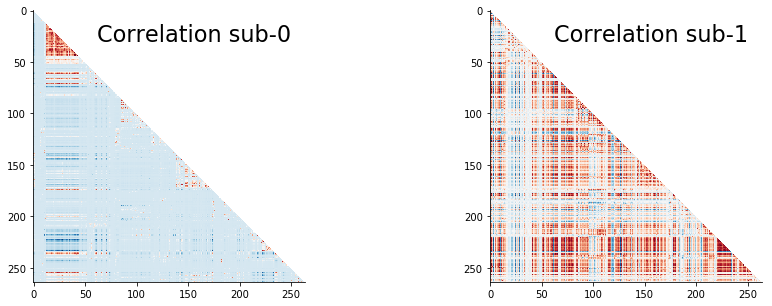

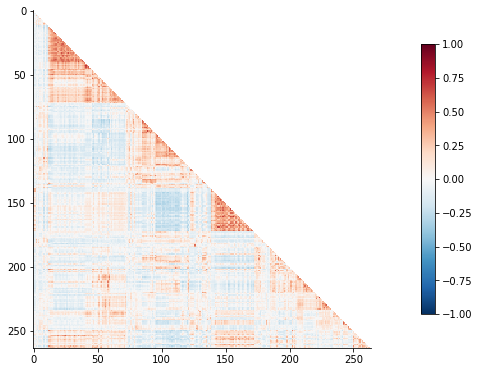

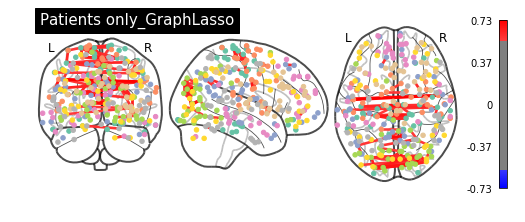

In [22]:
# Run group level correlation     
correlation_measure = ConnectivityMeasure(kind='correlation')

correlation_matrices = correlation_measure.fit_transform(timeseries_patients)

# All individual coefficients are stacked in a unique 2D matrix.
print(f'Correlations of subjects are stacked in an array of shape {correlation_matrices.shape}')
print()

mean_correlation_matrix = correlation_measure.mean_
print(f'Mean correlation has shape {mean_correlation_matrix.shape}')
print()  

_, axes = plt.subplots(1, 2, figsize=(15, 5))

import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

for i, (matrix, ax) in enumerate(zip(correlation_matrices, axes)):
    
    plotting.plot_matrix(matrix, 
                         tri='lower',
                         colorbar=False, 
                         axes=ax,
                         title=(f'Correlation sub-{i}'))


# Generate Connectivity Matrix
fig3 = plt.figure(figsize=(10,10))

        
plot3 = plotting.plot_matrix(mean_correlation_matrix, 
                             tri='lower',
                             vmin=-1.,
                             vmax=1., 
                             colorbar=True)
                             #title=f'Patients only_GraphLasso')
    
plot3.figure.savefig(f'../GroupLevelResults/PatientsOnly_ConnectivityMatrix_GraphLasso.png',
                     dpi=300,
                     bbox_inches='tight',
                     transparent=True)
    
plot4 = plotting.plot_connectome(mean_correlation_matrix,
                                 coords, 
                                 title='Patients only_GraphLasso',
                                 edge_threshold='99.8%',
                                 node_size=20,
                                 colorbar=True)

plot4.savefig(f'../GroupLevelResults/PatientsOnly_ConnectomeBrain_GraphLasso.png')